In [39]:
%run ./utils.ipynb
    

In [3]:
#Loading preprocessed data
noisy_x_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_x_train.npy'))
noisy_y_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_y_train.npy'))
print(noisy_x_train.shape)
print(noisy_y_train.shape)
clean_x_test = tf.convert_to_tensor(load('resources/clean_x_test_minst.npy'))
clean_y_test = tf.convert_to_tensor(load('resources/clean_y_test_minst.npy'))
print(clean_x_test.shape)
print(clean_y_test.shape)
trojan_x_test = tf.convert_to_tensor(load('resources/trojan_injected_x_test_minst.npy'))
trojan_y_test = tf.convert_to_tensor(load('resources/trojan_injected_y_test_minst.npy'))
print(trojan_x_test.shape)
print(trojan_y_test.shape)
perturb_x_train_clean = tf.convert_to_tensor(load('resources/perturbed_x_train_clean_minst.npy'))
print(perturb_x_train_clean.shape)
perturb_x_train_noisy = tf.convert_to_tensor(load('resources/perturbed_x_train_noisy_minst.npy'))
print(perturb_x_train_noisy.shape)



2021-10-22 01:14:22.529249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 01:14:22.571761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 01:14:22.572638: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 01:14:22.574821: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)
(10000, 100, 28, 28)


2021-10-22 01:14:48.716310: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3136000000 exceeds 10% of free system memory.


(10000, 100, 28, 28)


2021-10-22 01:15:15.227174: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3136000000 exceeds 10% of free system memory.


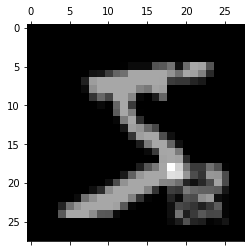

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(noisy_x_train[0],cmap='gray')

In [5]:
print(noisy_y_train[0])

tf.Tensor(5, shape=(), dtype=uint8)


In [6]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(512,kernel_initializer=HeNormal()))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 512)           14848     
_________________________________________________________________
flatten (Flatten)            (None, 14336)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                143370    
Total params: 158,218
Trainable params: 158,218
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['categorical_accuracy'])

In [9]:
y_train = np_utils.to_categorical(noisy_y_train,10)
clean_y_test_cat = np_utils.to_categorical(clean_y_test,10)
trojan_y_test_cat = np_utils.to_categorical(trojan_y_test,10)

In [10]:
model.fit(noisy_x_train,y_train,epochs=10,batch_size=64)

2021-10-22 01:18:29.032245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.3750 - categorical_accuracy: 0.8964
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2968 - categorical_accuracy: 0.9169
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2769 - categorical_accuracy: 0.9230
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2695 - categorical_accuracy: 0.9236
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2584 - categorical_accuracy: 0.9271
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2537 - categorical_accuracy: 0.9265
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2498 - categorical_accuracy: 0.9291
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2480 - categorical_accuracy: 0.9291
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2454 - categorical_accuracy:

In [11]:
#predicting clean test inputs
y_predict = model.predict(clean_x_test)

In [12]:
# clean test accuracy
model.evaluate(clean_x_test,clean_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3170 - categorical_accuracy: 0.9157


[0.31695544719696045, 0.9157000184059143]

In [13]:
print(y_predict[0])

[9.1386525e-08 1.9479209e-13 8.0656434e-07 4.9241656e-04 8.4486915e-09
 6.0335278e-06 5.1760305e-13 9.9942625e-01 1.6681576e-06 7.2674098e-05]


In [14]:
print(clean_y_test[0])

tf.Tensor(7, shape=(), dtype=uint8)


In [15]:
#Predicting trojan test inputs
trojan_y_predict = model.predict(trojan_x_test)

In [16]:
# trojan attack accuracy
model.evaluate(trojan_x_test,trojan_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0020 - categorical_accuracy: 0.9994


[0.00203861016780138, 0.9994000196456909]

In [18]:
clean_inputs_entropy = calculate_average_entropy(perturb_x_train_clean)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
noisy_inputs_entropy = calculate_average_entropy(perturb_x_train_noisy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


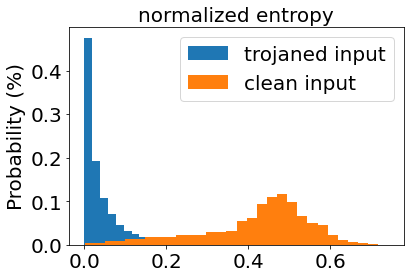

In [40]:
plot_entropy_figures(noisy_inputs_entropy,clean_inputs_entropy,'resources/outputs/FCN/1000000_1_fcn.png')

In [35]:
print("Entropy difference", np.mean(clean_inputs_entropy)- np.mean(noisy_inputs_entropy))

Entropy difference 0.3820458804340419
